In [130]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import display
pd.options.display.max_columns = None
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot


In [204]:
libs = {}
libs['SRR1197125'] = 'SRR1197125_germinating_seed_embryo'
libs['SRR1197126'] = 'SRR1197126_seedling_leaf'
libs['SRR1197127'] = 'SRR1197127_seedling_root'
libs['SRR1197128'] = 'SRR1197128_grain_8_days_after_pollination'

path_base = '/home/juan/Documents/dev/mirna_mite/'
path_annotation = '../data/Triticum_aestivum.IWGSC.47.gff3'
path_libs = '../data/res/sun_deg/%s'
path_transcripts = '../data/fixed.cdna.all.fa'
path_transcripts_res = '../data/res/targets.fa'
path_blast_res = '../data/res/transcripts_mites.csv'
path_blast_res_filtered = '../data/res/transcripts_mites.filtered.csv'
path_mirna_res = '../data/res/all_results.csv'
path_res_target = '../data/res/res_target.csv'
path_res_prod_mite_target_all = '../data/res/res_prod_mites_target_all.csv'
path_res_final = '../data/res/res_prod_target.csv'
path_psrna = '../data/res/psRNATargetJob-1567169569267499.txt'


In [132]:
dfs = []
for lib,description in libs.items():
    path_lib = path_libs % lib
    df = pd.read_csv(path_lib, sep='\t',comment='#')
    print(lib, len(df.index))
    df['lib'] = description
    dfs.append(df)


SRR1197125 3347
SRR1197126 4916
SRR1197127 6193
SRR1197128 2110


In [133]:
df = pd.concat(dfs)
print(len(df.index))

16566


In [134]:
df.drop_duplicates(['SiteID','Query','lib'], inplace=True)
print(len(df.index))

16566


In [135]:
df = df.reset_index(drop=True)


In [136]:
df = df[df.DegradomeCategory <= 3]
print(len(df.index))

7002


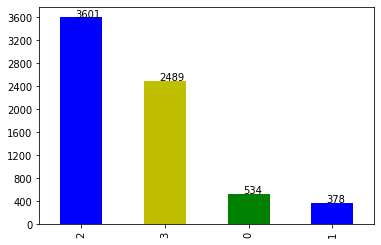

In [137]:
ax = df.DegradomeCategory.value_counts().plot(kind='bar',color=['b','y','g'])
x_offset = -0.07
y_offset = 0.15
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))


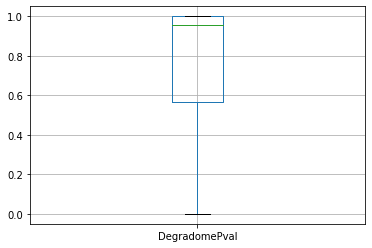

In [138]:
df.boxplot(column=['DegradomePval'])


In [139]:
print(len(df[df.DegradomePval < 0.05].index))

455


In [140]:
df.Transcript.nunique()

5190

In [141]:
df['gene'] =  df.Transcript.str.split('.').str[0]

In [142]:
df.head(2)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene
0,TraesCS1A02G000300.1:66,sun_all_Cluster_118867_6B_214030433_214030626,TraesCS1A02G000300.1,54,75,66,-43.6,-28.4,0.651376,9.0,"1-2,75-74;5-11,71-65;13-14,63-62;16-22,60-54","3-4,73-72[SIL];12-12,64-64[SIL];15-15,61-61[SIL]",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.956112,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS1A02G000300
1,TraesCS1A02G000400.1:1381,sun_all_Cluster_118867_6B_214030433_214030626,TraesCS1A02G000400.1,1369,1390,1381,-43.6,-28.4,0.651376,9.0,"1-2,1390-1389;5-11,1386-1380;13-14,1378-1377;1...","3-4,1388-1387[SIL];12-12,1379-1379[SIL];15-15,...",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.949612,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS1A02G000400


In [143]:
df.gene.nunique()

4869

In [144]:
df.Query.nunique()

261

In [145]:
transcripts = set()
for k,v in df.iterrows():
    transcript = v.Transcript
    transcripts.add(transcript)

In [146]:
fasta_seq = SeqIO.parse(path_transcripts, 'fasta')


In [147]:
lens = {}
buffer_seqs = []
for record in fasta_seq:
    if record.id in transcripts:
        buffer_seqs.append(record)
        clean_seq = ''.join(str(record.seq).splitlines())
        lens[record.id] = len(clean_seq)
SeqIO.write(buffer_seqs, path_transcripts_res, "fasta")
print(len(buffer_seqs))
print(path_transcripts_res)

5190
../data/res/targets.fa


In [148]:
path_blast_res

'../data/res/transcripts_mites.csv'

In [149]:
df_mites = pd.read_csv(path_blast_res, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs','score']
df_mites.columns = cols
df_mites = df_mites[df_mites.pident >= 80]
df_mites = df_mites[df_mites.qcovs >= 80]
print(len(df_mites.index))
df_mites.head(2)

8445


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
0,MITE_0,TraesCS5D02G132100.1,1,80,479,399,6,1,91.358,1.580000e-25,81,80,2089,100,123
1,MITE_0,TraesCS1A02G419600.1,1,80,2014,2094,7,1,90.123,1.930000e-24,81,80,2243,100,118


In [150]:
df['new_start'] = df[['TStart','TStop']].min(axis=1)
df['new_end'] = df[['TStart','TStop']].max(axis=1)
df['TStart'] = df['new_start']
df['TStop'] = df['new_end']
df = df.drop('new_start',axis=1).drop('new_end',axis=1)


In [151]:
df_mites['new_start'] = df_mites[['sstart','send']].min(axis=1)
df_mites['new_end'] = df_mites[['sstart','send']].max(axis=1)
df_mites['sstart'] = df_mites['new_start']
df_mites['send'] = df_mites['new_end']
df_mites = df_mites.drop('new_start',axis=1).drop('new_end',axis=1)


In [152]:
df_mites.head(4)

,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
0,MITE_0,TraesCS5D02G132100.1,1,80,399,479,6,1,91.358,1.580000e-25,81,80,2089,100,123
1,MITE_0,TraesCS1A02G419600.1,1,80,2014,2094,7,1,90.123,1.930000e-24,81,80,2243,100,118
2,MITE_0,TraesCS1A02G419600.1,1,80,2014,2094,7,1,90.123,1.930000e-24,81,80,2243,100,118
3,MITE_0,TraesCS1B02G479800.1,1,80,3394,3474,7,1,90.123,1.930000e-24,81,80,3785,100,118


In [153]:
df_mites = df_mites.drop_duplicates()


In [154]:
print(len(df_mites.index))
df_mites.head(8)

8327


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
0,MITE_0,TraesCS5D02G132100.1,1,80,399,479,6,1,91.358,1.580000e-25,81,80,2089,100,123
1,MITE_0,TraesCS1A02G419600.1,1,80,2014,2094,7,1,90.123,1.930000e-24,81,80,2243,100,118
3,MITE_0,TraesCS1B02G479800.1,1,80,3394,3474,7,1,90.123,1.930000e-24,81,80,3785,100,118
5,MITE_0,TraesCS3B02G287100.1,1,80,1338,1418,7,1,90.123,1.930000e-24,81,80,1445,100,118
7,MITE_0,TraesCS6A02G276700.1,1,80,3094,3174,7,1,90.123,1.930000e-24,81,80,3296,100,118
9,MITE_0,TraesCS2A02G301400.1,1,80,802,882,8,1,88.889,8.200000e-23,81,80,914,100,113
11,MITE_0,TraesCS2B02G329600.1,1,80,2594,2675,7,2,89.024,2.860000e-22,82,80,2897,100,111
13,MITE_0,TraesCS4A02G349800.1,1,80,7444,7526,7,3,87.952,1.000000e-21,83,80,7721,100,109


In [155]:
#c_maxes = df_mites.groupby(['qseqid', 'sseqid']).score.transform(max)
#df_mites = df_mites.loc[df_mites.score == c_maxes]


In [156]:
df_mites.head(4)

,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
0,MITE_0,TraesCS5D02G132100.1,1,80,399,479,6,1,91.358,1.580000e-25,81,80,2089,100,123
1,MITE_0,TraesCS1A02G419600.1,1,80,2014,2094,7,1,90.123,1.930000e-24,81,80,2243,100,118
3,MITE_0,TraesCS1B02G479800.1,1,80,3394,3474,7,1,90.123,1.930000e-24,81,80,3785,100,118
5,MITE_0,TraesCS3B02G287100.1,1,80,1338,1418,7,1,90.123,1.930000e-24,81,80,1445,100,118


In [157]:
df['MITE_target'] = None

In [158]:
for k,v in df.iterrows():
    start = v.TStart
    end = v.TStop
    transcript = v.Transcript
    
    df_filter = df_mites[df_mites.qseqid.str.contains('DTT')]
    df_filter = df_filter[df_filter.sseqid==transcript]
    df_filter = df_filter[(df_filter.sstart <= start) & (df_filter.send >= end)]
    if len(df_filter.index) > 0:
        #print(k, transcript,df_filter.loc[df_filter['score'].idxmax()].qseqid)
        df.at[k, 'MITE_target'] = df_filter.loc[df_filter['score'].idxmax()].qseqid
    else:
        df_filter = df_mites[df_mites.qseqid.str.contains('MITE_')]
        df_filter = df_filter[df_filter.sseqid==transcript]
        df_filter = df_filter[(df_filter.sstart <= start) & (df_filter.send >= end)]
        if len(df_filter.index) > 0:
            #print(k,transcript,df_filter.loc[df_filter['score'].idxmax()].qseqid)
            df.at[k, 'MITE_target'] = df_filter.loc[df_filter['score'].idxmax()].qseqid
        

28 TraesCS1A02G116200.2 MITE_803
136 TraesCS1A02G419600.1 MITE_296
144 TraesCS1A02G443600.1 MITE_1689
167 TraesCS1B02G085900.1 DTT_Tdur_Icarus_294D11-3
249 TraesCS1B02G325200.1 DTT_Taes_Icarus_BQ605897-1
314 TraesCS1D02G010200.1 DTT_Taes_Icarus_BJ238962-1
407 TraesCS1D02G280700.1 DTT_Taes_Icarus_BQ281801-1
530 TraesCS2A02G274200.2 DTT_Bdis_BdisStowawayT_consensus-1
536 TraesCS2A02G281000.1 DTT_Hvul_Pan_M801L24-1
539 TraesCS2A02G281000.2 DTT_Hvul_Pan_M801L24-1
611 TraesCS2A02G529000.1 DTT_Taes_Hades_42j2-4
623 TraesCS2A02G561600.1 MITE_1739
689 TraesCS2B02G228200.1 DTT_Taes_Icarus_BJ306535-1
723 TraesCS2B02G320300.1 MITE_155
778 TraesCS2B02G490200.1 MITE_1620
915 TraesCS2D02G327200.1 DTT_Taes_Athos_42j2-14
980 TraesCS2D02G558100.2 DTT_Hvul_Icarus_AV928891-1
1055 TraesCS3A02G227900.2 MITE_1739
1062 TraesCS3A02G274100.1 DTT_Tdur_Athos_103H9-1
1157 TraesCS3B02G129400.1 MITE_1605
1170 TraesCS3B02G160900.1 DTT_Taes_Icarus_BQ166298-1
1206 TraesCS3B02G287100.1 MITE_296
1243 TraesCS3B02G381800.

In [159]:
df_mites.to_csv(path_blast_res_filtered,sep='\t', index=None)
path_blast_res_filtered

'../data/res/transcripts_mites.filtered.csv'

In [160]:
total = len(df.index)
w_mites = len(df[df.MITE_target.notnull()].index)
w_o_mites = len(df[df.MITE_target.isnull()].index)
print('Total', total)
print('W mites', w_mites)
print('WO mites', w_o_mites)
print(w_mites * 100 / total)

Total 7002
W mites 187
WO mites 6815
2.6706655241359614


In [161]:
#add annotations

In [162]:
df_ann = pd.read_csv(path_annotation, index_col=False, sep='\t', comment='#', header=None)
df_ann.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_ann.index))

1957744


In [163]:
df_ann.head(1)

,seqname,source,feature,start,end,score,strand,frame,attribute
0,1A,International Wheat Genome Sequencing Consortium,chromosome,1,594102056,.,.,.,"ID=chromosome:1A;Alias=chr1A,LS992080.1"


In [164]:
df_ann['feature_len'] = abs(df_ann['start'] - df_ann['end'])


In [165]:
df_ann = df_ann[
    (df_ann.feature == 'three_prime_UTR') | 
    (df_ann.feature == 'five_prime_UTR')]
print(len(df_ann.index))


216091


In [166]:
df_ann = df_ann.reset_index(drop=True)


In [167]:
#adds transcript name
df_ann['transcript'] = df_ann['attribute'].str.split('transcript:').str[1]
df_ann['transcript'] = df_ann['transcript'].str.split(';').str[0]

In [168]:
df_ann.head(5)

,seqname,source,feature,start,end,score,strand,frame,attribute,feature_len,transcript
0,1A,IWGSC,three_prime_UTR,40098,40731,.,-,.,Parent=transcript:TraesCS1A02G000100.1,633,TraesCS1A02G000100.1
1,1A,IWGSC,three_prime_UTR,58474,58507,.,-,.,Parent=transcript:TraesCS1A02G000100.1,33,TraesCS1A02G000100.1
2,1A,IWGSC,five_prime_UTR,58769,58897,.,-,.,Parent=transcript:TraesCS1A02G000100.1,128,TraesCS1A02G000100.1
3,1A,IWGSC,five_prime_UTR,70089,70338,.,-,.,Parent=transcript:TraesCS1A02G000100.1,249,TraesCS1A02G000100.1
4,1A,IWGSC,three_prime_UTR,70557,70650,.,+,.,Parent=transcript:TraesCS1A02G000200.1,93,TraesCS1A02G000200.1


In [169]:
#remove duplicated
indexes = df_ann[(df_ann.strand=='+') & (df_ann.feature=='five_prime_UTR')].duplicated(['feature','transcript'],keep='first')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]

indexes = df_ann[(df_ann.strand=='-') & (df_ann.feature=='five_prime_UTR')].duplicated(['feature','transcript'],keep='last')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]


indexes = df_ann[(df_ann.strand=='+') & (df_ann.feature=='three_prime_UTR')].duplicated(['feature','transcript'],keep='last')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]

indexes = df_ann[(df_ann.strand=='-') & (df_ann.feature=='three_prime_UTR')].duplicated(['feature','transcript'],keep='first')
indexes = indexes[indexes == True].index
df_ann = df_ann[~df_ann.index.isin(indexes)]



In [170]:
print(len(df_ann.index))
df_ann.head(5)

180799


,seqname,source,feature,start,end,score,strand,frame,attribute,feature_len,transcript
0,1A,IWGSC,three_prime_UTR,40098,40731,.,-,.,Parent=transcript:TraesCS1A02G000100.1,633,TraesCS1A02G000100.1
3,1A,IWGSC,five_prime_UTR,70089,70338,.,-,.,Parent=transcript:TraesCS1A02G000100.1,249,TraesCS1A02G000100.1
5,1A,IWGSC,three_prime_UTR,88242,89245,.,+,.,Parent=transcript:TraesCS1A02G000200.1,1003,TraesCS1A02G000200.1
6,1A,IWGSC,five_prime_UTR,95906,96020,.,+,.,Parent=transcript:TraesCS1A02G000300.1,114,TraesCS1A02G000300.1
8,1A,IWGSC,five_prime_UTR,102794,104077,.,+,.,Parent=transcript:TraesCS1A02G000400.1,1283,TraesCS1A02G000400.1


In [171]:
df['annotation_target'] = ''

In [172]:
for k,v in df.iterrows():
    transcript_start = v.TStart
    transcript_stop = v.TStop
    transcript_slice = v.TSlice
    transcript_name = v.Transcript
    transcript_len = lens[transcript_name]
    other = df_ann[df_ann.transcript == transcript_name]
    for k2,v2 in other.iterrows():
        if v2.feature == 'five_prime_UTR' and v2.strand == '+' and transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'five_prime_UTR'
        if v2.feature == 'five_prime_UTR' and v2.strand == '-' and transcript_len - transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'five_prime_UTR'
        if v2.feature == 'three_prime_UTR' and v2.strand == '+' and transcript_slice >= transcript_len - v2.feature_len:
             df.loc[k, 'annotation_target'] = 'three_prime_UTR'
        if v2.feature == 'three_prime_UTR' and v2.strand == '-' and transcript_slice <= v2.feature_len:
             df.loc[k, 'annotation_target'] = 'three_prime_UTR'


In [173]:
df_ann[df_ann.transcript=='TraesCS1A02G001400.1']

,seqname,source,feature,start,end,score,strand,frame,attribute,feature_len,transcript
20,1A,IWGSC,three_prime_UTR,294611,295669,.,-,.,Parent=transcript:TraesCS1A02G001400.1,1058,TraesCS1A02G001400.1
22,1A,IWGSC,five_prime_UTR,304348,305428,.,-,.,Parent=transcript:TraesCS1A02G001400.1,1080,TraesCS1A02G001400.1


In [174]:
df['annotation_target'].fillna('exon', inplace=True)

In [175]:
df['annotation_target'].replace('', 'exon',inplace=True)

In [176]:
df[['SiteID','annotation_target']].head(10)

,SiteID,annotation_target
0,TraesCS1A02G000300.1:66,five_prime_UTR
1,TraesCS1A02G000400.1:1381,exon
3,TraesCS1A02G000900.1:1117,exon
4,TraesCS1A02G001000.1:1547,five_prime_UTR
5,TraesCS1A02G001100.1:3677,five_prime_UTR
7,TraesCS1A02G001400.1:1787,five_prime_UTR
8,TraesCS1A02G001400.1:649,three_prime_UTR
13,TraesCS1A02G033600.1:767,three_prime_UTR
15,TraesCS1A02G058400.2:1721,exon
21,TraesCS1A02G092900.1:256,three_prime_UTR


In [177]:
df['annotation_target'].value_counts()

exon               5494
three_prime_UTR    1138
five_prime_UTR      370
Name: annotation_target, dtype: int64

In [179]:
df[df.MITE_target.notnull()]['annotation_target'].value_counts()

three_prime_UTR    85
exon               79
five_prime_UTR     23
Name: annotation_target, dtype: int64

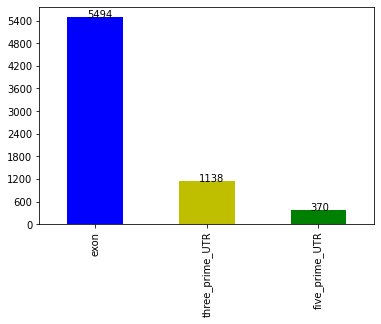

In [180]:
ax = df.annotation_target.value_counts().plot(kind='bar',color=['b','y','g'])
x_offset = -0.07
y_offset = 0.15
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax
plt.savefig('../data/res/targets.png',transparent=True, bbox_inches='tight', pad_inches=0)

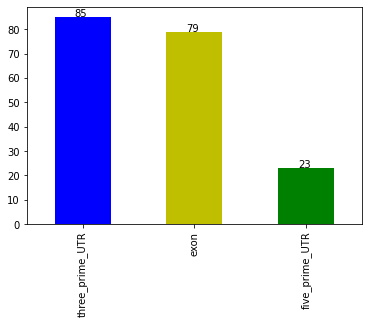

In [182]:
ax = df[df.MITE_target.notnull()].annotation_target.value_counts().plot(kind='bar',color=['b','y','g'])

x_offset = -0.07
y_offset = 0.15
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax
plt.savefig('../data/res/targets_mites.png',transparent=True, bbox_inches='tight', pad_inches=0)


In [183]:
df.lib.value_counts()

SRR1197127_seedling_root                     2909
SRR1197126_seedling_leaf                     2219
SRR1197125_germinating_seed_embryo           1135
SRR1197128_grain_8_days_after_pollination     739
Name: lib, dtype: int64

In [184]:
df.to_csv(path_res_target, index=None)
path_res_target

'../data/res/res_target.csv'

In [205]:
df.to_csv(path_res_target, index=None)
path_res_target

'../data/res/res_target.csv'

In [189]:
df_mirna_res = pd.read_csv(path_mirna_res, sep='\t')
print(len(df_mirna_res.index))
df_mirna_res.head(2)

270


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation
0,1A:117385432-117385825,sun_mites_MITE_T_430_1A_117385432_117385825,394,17,0.135,3,0.941,+,UCUGCACCCUGAAUGAUGAAUAGU,11,0.412,24,Y,-1.0,1,0,0,1,0,1,14,1A,117385432-117385825,117385432,117385825,MITE_21,NaN,intergenic
1,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.000,+,UAGAGAUUUCAAAUGGAACAC,7,0.500,21,Y,-1.0,0,2,2,9,0,0,3,1A,169645857-169646029,169645857,169646029,DTT_Tdur_Thalos_103H9-1,NaN,intron


In [190]:
#df_merge = pd.merge(df_mirna_res[df_mirna_res.MITE.notnull()],df[df.MITE.notnull()],left_on='Name', right_on='Query')
df_merge = pd.merge(df_mirna_res,df,left_on='Name', right_on='Query')
print(len(df_merge.index))

7002


In [191]:
df_merge.head(1)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,0.5,21,Y,-1.0,0,2,2,9,0,0,3,1A,169645857-169646029,169645857,169646029,DTT_Tdur_Thalos_103H9-1,NaN,intron,TraesCS2A02G067800.1:1817,mrcv_mites_MITE_T_62663_1A_169645857_169646029,TraesCS2A02G067800.1,1808,1826,1817,-31.2,-20.88,0.669231,7.0,"1-10,1826-1817;15-20,1814-1809","11-14,1816-1815[AILq];21-21,1808-1808[UP3]",.((((((..--((((((((((&))))))))))....)))))).,AUGUUCCUG--GAAAUCUCUA&UAGAGAUUUCAAAUGGAACAC,2,0.56284,../data/res/sun_plots/SRR1197127/mrcv_mites_MI...,SRR1197127_seedling_root,TraesCS2A02G067800,None,exon


In [192]:
df_merge.to_csv(path_res_final, index=None)
path_res_final

'../data/res/res_prod_target.csv'

In [208]:
df_merge[df_merge['MITE'].notnull()].to_csv(path_res_prod_mite_target_all, index=None)
print(path_res_prod_mite_target_all)
print(len(df_merge[df_merge['MITE'].notnull()].index))
df_merge[df_merge['MITE'].notnull()].head(2)

../data/res/res_prod_mites_target_all.csv
908


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.000,+,UAGAGAUUUCAAAUGGAACAC,7,0.500,21,Y,-1.0,0,2,2,9,0,0,3,1A,169645857-169646029,169645857,169646029,DTT_Tdur_Thalos_103H9-1,NaN,intron,TraesCS2A02G067800.1:1817,mrcv_mites_MITE_T_62663_1A_169645857_169646029,TraesCS2A02G067800.1,1808,1826,1817,-31.2,-20.88,0.669231,7.0,"1-10,1826-1817;15-20,1814-1809","11-14,1816-1815[AILq];21-21,1808-1808[UP3]",.((((((..--((((((((((&))))))))))....)))))).,AUGUUCCUG--GAAAUCUCUA&UAGAGAUUUCAAAUGGAACAC,2,0.562840,../data/res/sun_plots/SRR1197127/mrcv_mites_MI...,SRR1197127_seedling_root,TraesCS2A02G067800,None,exon
243,1B:161992200-161992280,sun_all_Cluster_8835_1B_161992200_161992280,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,0.074,21,Y,-1.0,0,1,0,132,0,0,2,1B,161992200-161992280,161992200,161992280,MITE_1712,hvu-miR6197,intron,TraesCS2B02G393000.1:2281,sun_all_Cluster_8835_1B_161992200_161992280,TraesCS2B02G393000.1,2269,2290,2281,-32.4,-21.20,0.654321,4.5,"1-5,2290-2286;7-12,2284-2279;14-15,2277-2276;1...","6-6,2285-2285[SIL];13-13,2278-2278[SIL];x-x,22...",((((((.((.((((((.(((((&))))).)))))).))-)))))),CGUCUUGGCUUUUGUGUACAGA&UCUGUUCACAAAUGU-AAGACG,3,0.478345,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS2B02G393000,None,five_prime_UTR


In [ ]:
# some final numbers

In [188]:
df.head(2)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,TraesCS1A02G000300.1:66,sun_all_Cluster_118867_6B_214030433_214030626,TraesCS1A02G000300.1,54,75,66,-43.6,-28.4,0.651376,9.0,"1-2,75-74;5-11,71-65;13-14,63-62;16-22,60-54","3-4,73-72[SIL];12-12,64-64[SIL];15-15,61-61[SIL]",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.956112,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS1A02G000300,None,five_prime_UTR
1,TraesCS1A02G000400.1:1381,sun_all_Cluster_118867_6B_214030433_214030626,TraesCS1A02G000400.1,1369,1390,1381,-43.6,-28.4,0.651376,9.0,"1-2,1390-1389;5-11,1386-1380;13-14,1378-1377;1...","3-4,1388-1387[SIL];12-12,1379-1379[SIL];15-15,...",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.949612,../data/res/sun_plots/SRR1197125/sun_all_Clust...,SRR1197125_germinating_seed_embryo,TraesCS1A02G000400,None,exon


In [210]:
df_merge.head(1)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,Complexity,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,seqname,position,start,end,MITE,mirbase,annotation,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,gene,MITE_target,annotation_target
0,1A:169645857-169646029,mrcv_mites_MITE_T_62663_1A_169645857_169646029,173,16,0.126,3,1.0,+,UAGAGAUUUCAAAUGGAACAC,7,0.5,21,Y,-1.0,0,2,2,9,0,0,3,1A,169645857-169646029,169645857,169646029,DTT_Tdur_Thalos_103H9-1,NaN,intron,TraesCS2A02G067800.1:1817,mrcv_mites_MITE_T_62663_1A_169645857_169646029,TraesCS2A02G067800.1,1808,1826,1817,-31.2,-20.88,0.669231,7.0,"1-10,1826-1817;15-20,1814-1809","11-14,1816-1815[AILq];21-21,1808-1808[UP3]",.((((((..--((((((((((&))))))))))....)))))).,AUGUUCCUG--GAAAUCUCUA&UAGAGAUUUCAAAUGGAACAC,2,0.56284,../data/res/sun_plots/SRR1197127/mrcv_mites_MI...,SRR1197127_seedling_root,TraesCS2A02G067800,None,exon


In [219]:
print(">>>>Micros")
micros = len(df_merge['Name'].unique())
print(micros)

print(">>>>MITEs  en el sitio de produccion")
mites_prod_site = len(df_merge[df_merge['MITE'].notnull()]['Name'].unique())
print(mites_prod_site, int(mites_prod_site * 100 / micros ),'%')


print(">>>>MITEs en el target")
mites_target_site = len(df_merge[df_merge['MITE_target'].notnull()]['SiteID'].unique())
print(mites_target_site)


print(">Micors con MITEs  en el sitio de produccion y en el target")
print(len(df_merge[df_merge['MITE'].notnull() & df_merge['MITE_target'].notnull()]['Name'].unique()))


print(">MITEs  en el target, donde caen?")
print(df_merge[df_merge['MITE_target'].notnull()].annotation_target.value_counts())

print(">MITEs  en el sitio de produccion, donde caen?")
print(df_merge[df_merge['MITE'].notnull()].annotation_target.value_counts())


>>>>Micros
261
>>>>MITEs  en el sitio de produccion
37 14 %
>MITEs en el target
166
>Micors con MITEs  en el sitio de produccion y en el target
21
>MITEs  en el target, donde caen?
three_prime_UTR    85
exon               79
five_prime_UTR     23
Name: annotation_target, dtype: int64
>MITEs  en el sitio de produccion, donde caen?
exon               580
three_prime_UTR    248
five_prime_UTR      80
Name: annotation_target, dtype: int64


In [ ]:
df_mites = df[df.MITE != '']
df[df.MITE != ''][['SiteID','Query','Transcript','TStart','TStop','MITE','Sequence']].head()

In [ ]:
df_mirna_res = pd.read_csv(path_mirna_res, sep='\t')
df_mirna_res.rename(columns={'MITE':'MITE_prod'}, inplace=True)
print(len(df_mirna_res.index))
df_mirna_res.head(2)

In [ ]:
df_mirna_res_mites = df_mirna_res[df_mirna_res.MITE_prod.notnull()]
print(len(df_mirna_res_mites.index))


In [ ]:
df_mirna_res_mites['Name'] = df_mirna_res_mites.Name.str.split("|").str[0]

In [ ]:
df_mirna_res_mites_for_merge = df_mirna_res_mites[['Name','#Locus','MajorRNA','MITE_prod']]

In [ ]:
df_merge = pd.merge(df_mites,df_mirna_res_mites,left_on='Query', right_on='Name')

In [ ]:
df_new = df_merge[['SiteID','DegradomeCategory','Name','#Locus','MajorRNA','MITE','MITE_prod']]

In [ ]:
df_merge.head(2)

In [ ]:
df_merge['equal_mite'] = 0
for k,v in df_merge.iterrows():
    prods = v.MITE_prod.split(',')
    target = v.MITE.split(',')
    prods = set(filter(None, prods))
    target = set(filter(None, target))
    inter = target.intersection(prods)
    if inter:
        print(v.SiteID, v.Name, inter)
        df_merge.at[k, 'equal_mite'] = 1

In [ ]:
df_merge[df_merge.Name=='sun_all_Cluster_8835']

In [ ]:
total_ele = len(df_merge.index)
equal_mite = len(df_merge[df_merge.equal_mite==1].index)
print(equal_mite * 100 /total_ele)

In [ ]:
df_merge.to_csv(path_res_final, index=None)
path_res_final